# SCRIPT DESCRIPTION

# IMPORTING LIBRARIES

In [1]:
# Please check to ensure that all of the libraries imported in functions_pose_estimation_segmentation.py are installed
# in your environment or in the same file pathway. 
import functions_pose_estimation_segmentation
import shutil

# SAVING A BACKUP OF THIS SCRIPT

In [2]:
# Creating the original and target file directories.
original = r'/home/dan/Projects/PseudoOnlineTests_for_RTCoG/Scripts/Recent/PoseEstimation/pose_estimation_segmentation.ipynb'
target   = r'/mnt/shared/danprocessing/BACKUP/Projects/PseudoOnlineTests_for_RTCoG/Scripts/PoseEstimation/pose_estimation_segmentation.ipynb'

# Saving.
shutil.copyfile(original, target);

# INPUTTING PARAMETERS

In [3]:
"""
DESCRIPTION:
Please input the parameters below.
"""

# EXPERIMENTER INPUTS:
block_id          = 'Block1'
date              = '2023_01_06'
dir_intermediates = '/mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/Intermediates/'
patient_id        = 'CC01'
task              = 'Speller' 

"""
INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.
""";

# LOADING MEDIAPIPE HAND LANDMARK TRAJECTORIES

In [4]:
"""
DESCRIPTION:
Importing the xarray of hand trajectories. Note that these hand trajectories are curtailed between the block start and
stop times. The click array is loaded from:

dir_intermediates + patient_id + '/' + task + '/HandTrajectories/'  + date + '/Curtailed/ + 'date + '_' + block_id + '_hand_trajectories.nc'

Feel free to modify the pathway in which these hand trajectories are stored and modify the necessary experimenter
inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
hand_trajectories: [xarray (landmarks x time samples) > floats]; The time traces of the x- and y-coordinates 
                   for each landmark. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Loading the hand trajectories.
hand_trajectories = functions_pose_estimation_segmentation.load_hand_trajectories(block_id, date, dir_intermediates, patient_id, task)


HAND TRAJECTORIES ARRAY
<xarray.DataArray (landmarks: 42, time_seconds: 26846)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10574713, -0.10804598, -0.10550459, ..., -0.117506  ,
        -0.12019231, -0.12348668],
       ...,
       [ 0.58850575,  0.5908046 ,  0.59174312, ...,  0.61390887,
         0.61778846,  0.61985472],
       [ 0.48045977,  0.48275862,  0.47706422, ...,  0.45323741,
         0.45192308,  0.45520581],
       [ 0.69885057,  0.70114943,  0.70183486, ...,  0.72661871,
         0.73317308,  0.73607748]])
Coordinates:
  * landmarks     (landmarks) object 'WRIST_x' 'WRIST_y' ... 'PINKY_TIP_y'
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5

HAND LANDMARKS LIST:
['WRIST_x',
 'WRIST_y',
 'THUMB_CMC_x',
 'THUMB_CMC_y',
 'THUMB_MCP_x',
 'THUMB_MCP_y',
 'THUMB_IP_x',
 'THUMB_IP_y',

# LOADING CLICK INFORMATION

In [5]:
"""
DESCRIPTION:
Loading the click information dictionary. Note that the click information is curtailed between the block start and stop
times. The click array is loaded from:

dir_intermediates + patient_id + '/' + task + '/ClickDetections/'  + date + '/Curtailed/' + date + '_' + block_id + '_click_highlights'

Feel free to modify the pathway in which this click information is stored and modify the necessary experimenter inputs
appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
click_info: [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:      [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there is a 'no_click'
               string or a click-string specific to that xarray. For example, the 'backspace' key of the dictionary has an
               array where each element is a string named either 'no_click' or 'backspace_click'. The 'backspace_click' 
               elements do not occur consecutively and describe the instance a click on the backspace key occured. For the
               'keyboard' and 'stimcolumn' keys, similar rules apply. Time dimension is in units of s.
    plotcolor: [string]; Color corresponding to the type of click for plotting.
"""

# COMPUTATION:

# Loading the click information.
click_info = functions_pose_estimation_segmentation.load_click_information(block_id, date, dir_intermediates, patient_id, task)


# PLOTTING UPPER-LIMB TRAJECTORIES AND CLICK ACTIVITY FROM PARTICIPANT'S MONITOR

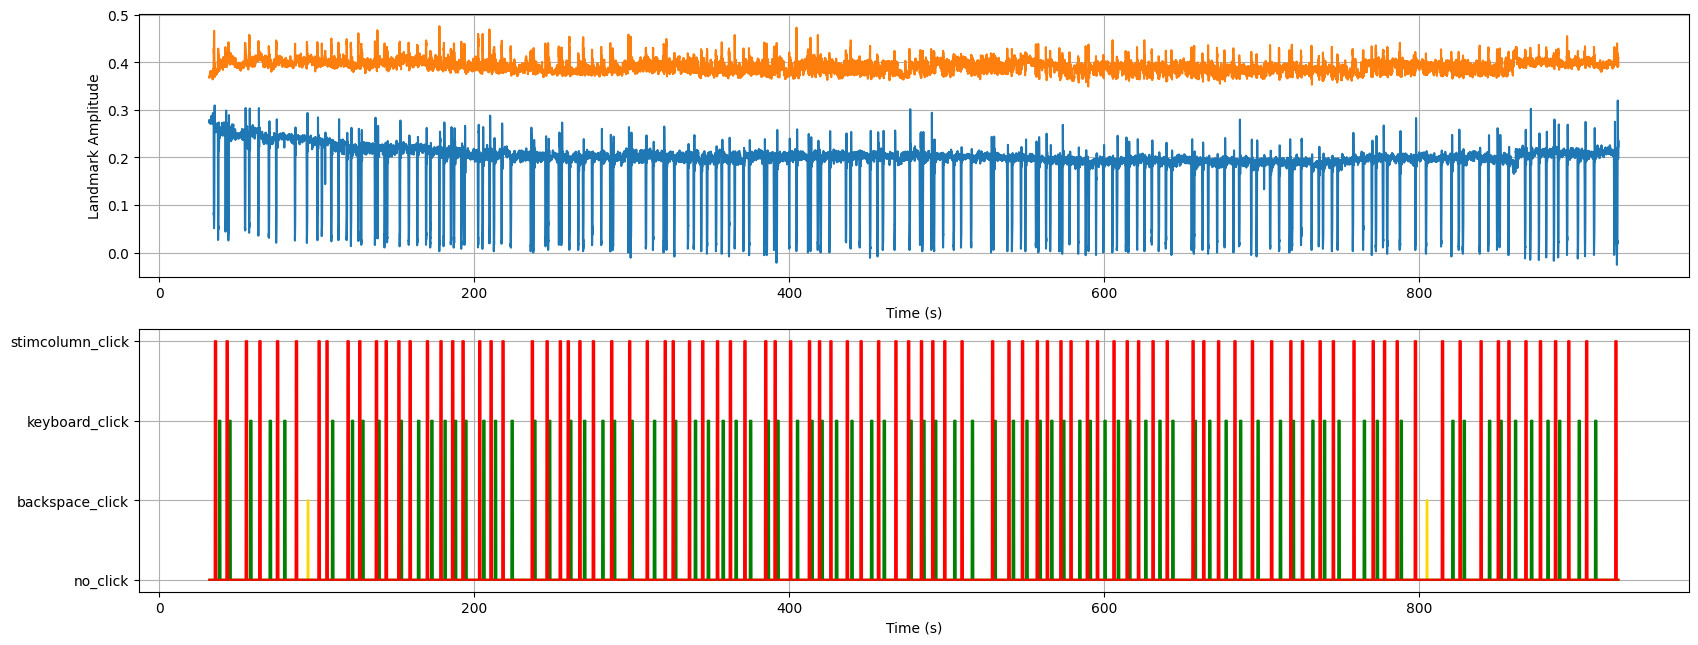

In [6]:
"""
DESCRIPTION:
The experimenter can choose to display whichever set of the above-displayed hand landmarks and inputs these into the 
landmark_trajectories_plotting list.
"""

# EXPERIMENTER INPUTS:
landmark_trajectories_plotting = ['MIDDLE_FINGER_TIP_x', 'THUMB_MCP_y']

"""
INPUT VARIABLES:
click_info:                     [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                       [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there
                                is a 'no_click' string or a click-string specific to that xarray. For example, the 'backspace'
                                key of the dictionary has an array where each element is a string named either 'no_click' or 
                                'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the 
                                instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
                                rules apply. Time dimension is in units of s.
    plotcolor:                  [string]; Color corresponding to the type of click for plotting.
hand_trajectories:              [xarray (landmarks x time samples) > floats]; The time traces of the x- and y-coordinates 
                                for each landmark. The time domain is in units of seconds. 
landmark_trajectories_plotting: [list > strings]; Possible landmarks to display.
"""

# COMPUTATION:

# Plotting hand landmarks and click information.
functions_pose_estimation_segmentation.plotting_landmarks_and_clicks(click_info, hand_trajectories, landmark_trajectories_plotting)


# REFERENCING HAND TRAJECTORY DATA TO PINKY AND THUMB LANDMARKS

In [7]:
"""
DESCRIPTION:
Each hand landmark is referenced according to experimenter-specified landmarks. Make sure that the landmarks that are
selected will not be used for further analysis as they will get normalized out to 0.
"""

# EXPERIMENTER INPUT:
ref1_x = 'PINKY_MCP_x'
ref2_x = 'THUMB_MCP_x'
refa_y = 'THUMB_MCP_y'
refb_y = 'THUMB_TIP_y'

"""
INPUT VARIABLES:
hand_trajectories: [xarray (landmarks x time samples) > floats]; The time trajectories of the x- and y-coordinates for each
                   landmark. The time domain is in units of seconds. 
ref1_x:            [string]; First horizontal reference landmark
ref2_x:            [string]; Second horizontal reference landmark
refa_y:            [string]; First vertical reference landmark
refb_y:            [string]; Second vertical reference landmark

OUTPUT VARIABLES:
hand_trajectories_ref: [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates for each
                       landmark. These are referenced in the x- and y-dimensions according to the reference landmarks. The
                       time domain is in units of seconds. 
"""

# COMPUTATION:

# Normalizing hand trajectories.
hand_trajectories_ref = functions_pose_estimation_segmentation.referencing_hand_trajectories(hand_trajectories, ref1_x, ref2_x, refa_y, refb_y)


# PLOTTING REFERENCED UPPER-LIMB TRAJECTORIES AND CLICK ACTIVITY FROM PARTICIPANT'S MONITOR

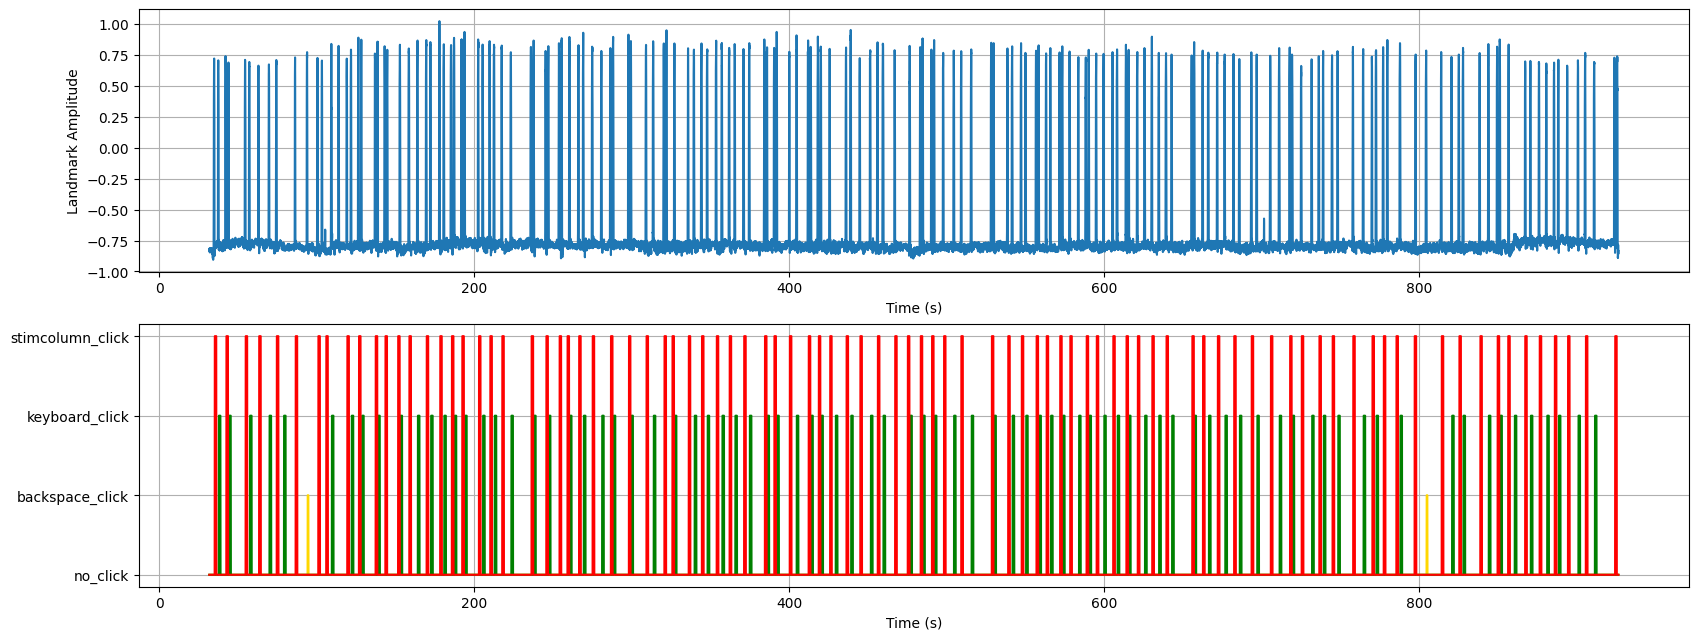

In [8]:
"""
DESCRIPTION:
The experimenter can choose to display whichever set of the above-displayed hand landmarks and inputs these into the 
landmark_trajectories_plotting list.
"""

# EXPERIMENTER INPUTS:
landmark_trajectories_plotting = ['MIDDLE_FINGER_TIP_y']

"""
INPUT VARIABLES:
click_info:                     [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                       [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there
                                is a 'no_click' string or a click-string specific to that xarray. For example, the 'backspace'
                                key of the dictionary has an array where each element is a string named either 'no_click' or 
                                'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the 
                                instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
                                rules apply. Time dimension is in units of s.
    plotcolor:                  [string]; Color corresponding to the type of click for plotting.
hand_trajectories_ref:          [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates
                                for each landmark. These are referenced in the x- and y-dimensions according to the reference
                                landmarks. The time dimension is in units of seconds. 
landmark_trajectories_plotting: [list > strings]; Possible landmarks to display.
"""

# COMPUTATION:

# Plotting hand landmarks and click information.
functions_pose_estimation_segmentation.plotting_landmarks_and_clicks(click_info, hand_trajectories_ref, landmark_trajectories_plotting)


# EXTRACTING ONLY RELEVANT TRAJECTORIES

In [9]:
"""
DESCRIPTION:
For each movement type, the experimenter enters the most relevant hand landmarks for visualization. The experimenter
creates a relevant_hand_landmarks dictionary where the keys of the dictionary are the possible movement classes and
the value for each key is a list of the most relevant hand landmarks to that class. The plotting cells above should
be used to determine these landmarks. Then for each movement type a dictionary, hand_trajectories_relevant is created
where for each movement, only the relevant hand trajectories are stored.
"""

# EXPERIMENTER INPUTS:
relevant_hand_landmarks = {
                           'grasp': ['MIDDLE_FINGER_MCP_x',\
                                     'MIDDLE_FINGER_MCP_y',\
                                     'MIDDLE_FINGER_PIP_x',\
                                     'MIDDLE_FINGER_PIP_y',\
                                     'MIDDLE_FINGER_DIP_x',\
                                     'MIDDLE_FINGER_DIP_y',\
                                     'MIDDLE_FINGER_TIP_x',\
                                     'MIDDLE_FINGER_TIP_y',\
                                     'RING_FINGER_MCP_x',\
                                     'RING_FINGER_MCP_y',\
                                     'RING_FINGER_PIP_x',\
                                     'RING_FINGER_PIP_y',\
                                     'RING_FINGER_DIP_x',\
                                     'RING_FINGER_DIP_y',\
                                     'RING_FINGER_TIP_x',\
                                     'RING_FINGER_TIP_y']
                            }

"""
INPUT VARIABLES:
hand_trajectories_ref:   [xarray (landmarks x time samples) > floats]; The trajectories of the x- and y-coordinates
                         for each landmark. These are referenced in the x- and y-dimensions according to the reference
                         landmarks. The time dimension is in units of seconds. 
relevant_hand_landmarks: [dictionary (key: string (movement type); Value: list > strings (hand landmarks))]; Each
                         movement holds a list of the most useful landmarks used to detect the corresponding 
                         movement type.
                         
OUTPUT VARIABLES:
hand_trajectories_relevant: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks x time samples)
                            > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                            dimension of each xarray is in units of s.
                         
"""

# COMPUTATION:

# Extracting only the relevant hand trajectories for each movement.
hand_trajectories_relevant = functions_pose_estimation_segmentation.extracting_relevant_trajectories(hand_trajectories_ref, relevant_hand_landmarks)


# UPLOADING DICTIONARY WITH MOVEMENT ONSET/OFFSET TIMES

In [10]:
"""
DESCRIPTION:
The dictionary containing the movement onset and offset times for each movement type will be uploaded if it exists. 
This dictionary would contain the previously saved movement onset/offset times for each movement. If there were no
previously saved onset/offset times for a particular movement (or all movements) a dictionary will be initiated and
saved for current and future inputting of onset/offset times. If it exists, the dictionary is loaded from:

dir_intermediates + patient_id + '/' + task + '/MovementOnsetsAndOffsets/' + date + '/' + 'dict_OnsetOffset_' + block_id

Feel free to modify the pathway in which this movement onset/offset dictionary is stored and modify the necessary
experimenter inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
"""

# Uploading the dictionary with movement onset and offsets.
movement_onsetsoffsets = functions_pose_estimation_segmentation.upload_movement_onsetsoffsets(block_id, date, dir_intermediates, patient_id, task)


{'grasp': [[34.433, 34.933],
           [37.1, 37.6],
           [41.733, 42.267],
           [43.6, 44.067],
           [54.133, 54.667],
           [56.8, 57.3],
           [62.633, 63.1],
           [69.3, 69.767],
           [73.967, 74.467],
           [85.9, 86.333],
           [93.467, 93.967],
           [100.067, 100.6],
           [102.933, 103.4],
           [105.133, 105.367],
           [108.867, 109.5],
           [113.5, 114.0],
           [118.733, 119.2],
           [121.4, 121.867],
           [126.033, 126.6],
           [127.933, 128.433],
           [136.667, 137.133],
           [138.233, 138.767],
           [142.767, 143.267],
           [144.367, 144.933],
           [152.4, 152.967],
           [158.067, 158.667],
           [163.567, 164.1],
           [169.133, 169.667],
           [171.8, 172.367],
           [177.533, 178.067],
           [180.267, 180.833],
           [184.867, 185.433],
           [186.733, 187.4],
           [191.533, 192.067],
        

# ZOOMING IN

Movement:  grasp

Movement Onset Times:  [100.067, 102.933, 105.133, 108.867, 113.5, 118.733, 121.4, 126.033, 127.933]
Movement Onset Inds:  [11, 12, 13, 14, 15, 16, 17, 18, 19]

Movement Offset Times:  [100.6, 103.4, 105.367, 109.5, 114.0, 119.2, 121.867, 126.6, 128.433]
Movement Offset Inds:  [11, 12, 13, 14, 15, 16, 17, 18, 19]


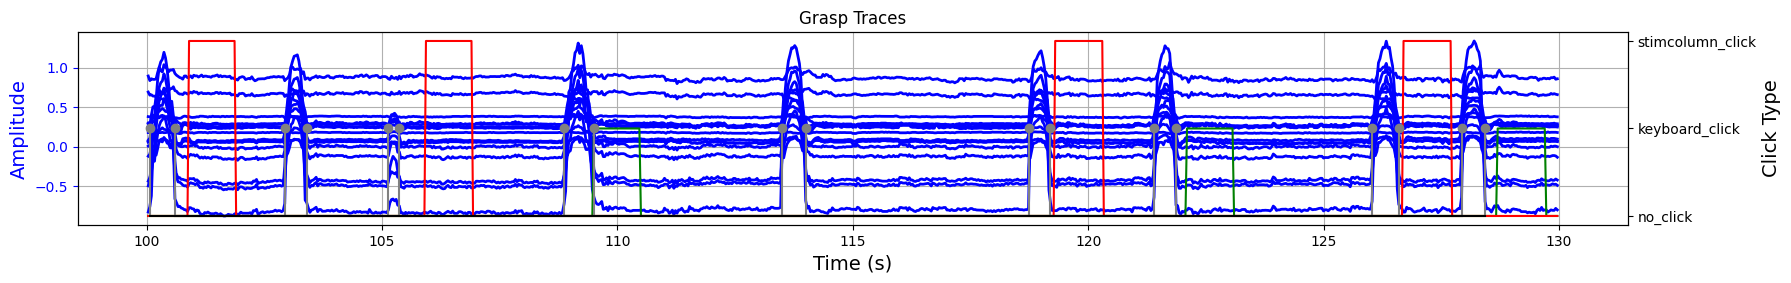

In [15]:
"""
DESCRIPTION:
The experimenter inputs a start and an end time between which to zoom in to view the relevant hand trajectories
for each movement and click information. The hand landmark trajectories are shown for each movement in a 
separate plot and should be used to inform determining the movement onset and offset times. If there already
exists in the movement onset/offset times dictionary onset and offset times within the zoomed-in region for a 
particular movement, these will also be displayed as well as their numerical cardinality (as a list).
"""

# EXPERIMENTER INPUTS:
movement_colors = {'grasp': 'blue'}
t_start_zoom    = 100
t_end_zoom      = 130

"""
INPUT VARIABLES:
click_info:                 [dict (key: string ('backspace','keyboard','stimcolumn'); Values: below)];
    data:                   [xarray (1 x time samples) > strings];  For each  time sample of the array of each key there
                            is a 'no_click' string or a click-string specific to that xarray. For example, the 'backspace'
                            key of the dictionary has an array where each element is a string named either 'no_click' or 
                            'backspace_click'. The 'backspace_click' elements do not occur consecutively and describe the 
                            instance a click on the backspace key occured. For the 'keyboard' and 'stimcolumn' keys, similar
                            rules apply. Time dimension is in units of s.
    plotcolor:              [string]; Color corresponding to the type of click for plotting.
hand_trajectories_relevant: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks x time samples)
                            > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                            dimension of each xarray is in units of s.
movement_colors:            [dictionary (key: string (movement); Value: string (color))]; There is a color associated
                            with each movement for plotting.
movement_onsetsoffsets:     [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                            dictionary containing all movement onset and offset times for each movement type.
t_end_zoom:                 [int (units: s)]; The ending time point for the zoomed in window. To set as the last time
                            point, leave as empty list [].
t_start_zoom:               [int (units: s)]; The starting time point for the zoomed in window. To set as the first
                            time point, leave as empty list [].    
""";

# Zooming in to the experimenter-specified region.
functions_pose_estimation_segmentation.zooming_in(click_info, hand_trajectories_relevant, movement_colors, movement_onsetsoffsets,\
                                                  t_end_zoom, t_start_zoom)


# DELETE MOVEMENT ONSET/OFFSET PAIR FROM DICTIONARY

In [12]:
"""
DESCRIPTION:
The experimenter may delete a movement onset/offset time pair. This could be done if, by looking at the 
zoomed-in relevant hand trajectories above, the experimenter determines that the movement onset/offset pair
is not in the correct location. The experimenter will be prompted which movement type to delete, and will
then be prompted to input the index number of that movement within the list onset/offset pairs of that 
particular movement.

INPUT VARIABLES:
block_id:               [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:                   [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates:      [string]; [string]; Intermediates directory where relevant information is stored.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
patient_id:             [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:                   [string]; Type of task that was run.
"""

# COMPUTATION:

# Deleting movement onset/offset time pair.
functions_pose_estimation_segmentation.delete_movement_onsetoffset_pair(block_id, date, dir_intermediates, movement_onsetsoffsets, patient_id, task)


Movement types:  ['grasp']


KeyboardInterrupt: Interrupted by user

# ADD MOVEMENT ONSET/OFFSET PAIR TO DICTIONARY

In [13]:
"""
DESCRIPTION:
The experimenter may add a movement onset/offset time pair. This can be done by looking at the zoomed-in relevant 
hand landmark trajectories above to determine which movement occurred and the onset and offset times of when it 
occurred. As such, the experimenter is prompted to enter which movement to add, followed by being prommpted to add
the movement onset and offset times.

INPUT VARIABLES:
block_id:                   [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:                       [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates:          [string]; [string]; Intermediates directory where relevant information is stored.
hand_trajectories_relevant: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks x time samples)
                            > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                            dimension of each xarray is in units of s.
movement_onsetsoffsets:     [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                            dictionary containing all movement onset and offset times for each movement type.
patient_id:                 [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:                       [string]; Type of task that was run.
"""

# COMPUTATION:

# Adding a pair of movement onset and offset times.
functions_pose_estimation_segmentation.add_movement_onsetoffset_pair(block_id, date, dir_intermediates, hand_trajectories_relevant,\
                                                                     movement_onsetsoffsets, patient_id, task)

Movement types:  ['grasp']


For which movement would you like to add onset/offset times? graspo
Invalid entry. For which movement would you like to add an onset/offset time pair? grasp
Please enter the desired onset time (s): 37
Please enter the desired offset time (s): 37.1
